In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
DATA = './DataSets/'

In [3]:
AIRLINE_STATS_CSV = DATA + 'airline_stats.csv'
KC_TAX_CSV = DATA + 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA + 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA + 'dfw_airline.csv'
SP500_DATA_CSV = DATA + 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA + 'sp500_sectors.csv'
STATE_CSV = DATA + 'state.csv'

In [4]:
# Table 1-2
state = pd.read_csv(STATE_CSV)
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [5]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


# Estimativas de Localização

In [6]:
state['Population'].mean()

6162876.3

In [7]:
trim_mean(state.loc[:, 'Population'], 0.1)

4783697.125

In [8]:
state['Population'].median()

4436369.5

In [9]:
state['Murder.Rate'].mean()

4.066

In [10]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [11]:
state.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,50,50,Alabama,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population,50.0,NaN,NaN,NaN,6162876.3,6848235.347401,563626.0,1833004.25,4436369.5,6680312.25,37253956.0
Murder.Rate,50.0,NaN,NaN,NaN,4.066,1.915736,0.9,2.425,4.0,5.55,10.3
Abbreviation,50,50,AL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Estimativas de Variabilidade

In [12]:
state['Population'].std() #Desvio Padrão

6848235.347401142

In [13]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25) #IQR

4847308.0

In [14]:
#Desvio Absoluto da Mediana
robust.scale.mad(state['Population'])

3849876.1459979336

# Percentis, Quartis e BoxPlot

In [15]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
Murder.Rate,1.6,2.425,4.0,5.55,6.51


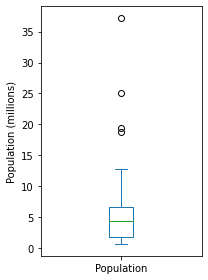

In [16]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

# Tabela de Frequência e Histograma

In [17]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

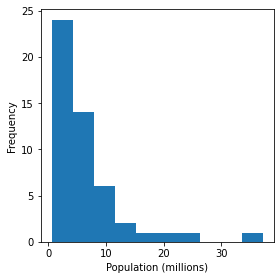

In [18]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

# Explorando Dados Binários e Categóricos

In [19]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
100 * dfw / dfw.values.sum()

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


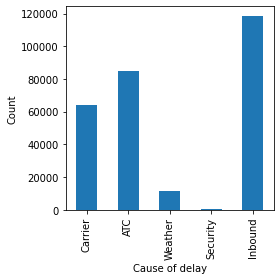

In [20]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [21]:
dfw.describe()

,Carrier,ATC,Weather,Security,Inbound
count,1.00,1.0,1.00,1.00,1.00
mean,64263.16,84856.5,11235.42,343.15,118427.82
std,NaN,NaN,NaN,NaN,NaN
min,64263.16,84856.5,11235.42,343.15,118427.82
25%,64263.16,84856.5,11235.42,343.15,118427.82
50%,64263.16,84856.5,11235.42,343.15,118427.82
75%,64263.16,84856.5,11235.42,343.15,118427.82
max,64263.16,84856.5,11235.42,343.15,118427.82


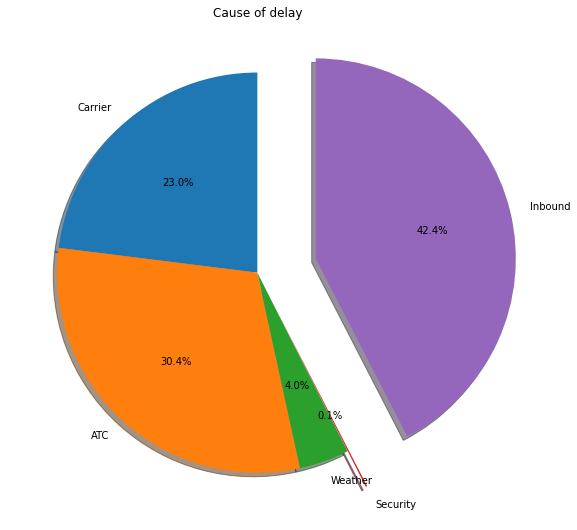

In [22]:
explode = (0, 0, 0, 0.2, 0.3)
plt.figure(figsize=(8,8))
plt.pie(dfw.max(), labels=dfw.columns, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Cause of delay')

plt.tight_layout()
plt.show()

# Correlação